In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Imported libraries for data preprocessing

In [3]:
# reading file into a dataframe 
df = pd.read_excel('assignment-covid-19-data-set-cleaned.xlsx',sheet_name=2)
df.head()

,Country/Region,Date,Confirmed,Deaths,Recovered
0,Australia,2020-01-22,0,0,0
1,Canada,2020-01-22,0,0,0
2,China,2020-01-22,548,17,28
3,Denmark,2020-01-22,0,0,0
4,France,2020-01-22,0,0,0


In [4]:
df.shape #Dimensions of The data set

(13213, 5)

In [5]:
df.isna().sum()  # Checking for the missing values.

Country/Region    0
Date              0
Confirmed         0
Deaths            0
Recovered         0
dtype: int64

In [6]:
df.info() # Data inforamtion with their datatype details.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13213 entries, 0 to 13212
Data columns (total 5 columns):
Country/Region    13213 non-null object
Date              13213 non-null datetime64[ns]
Confirmed         13213 non-null int64
Deaths            13213 non-null int64
Recovered         13213 non-null int64
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 516.3+ KB


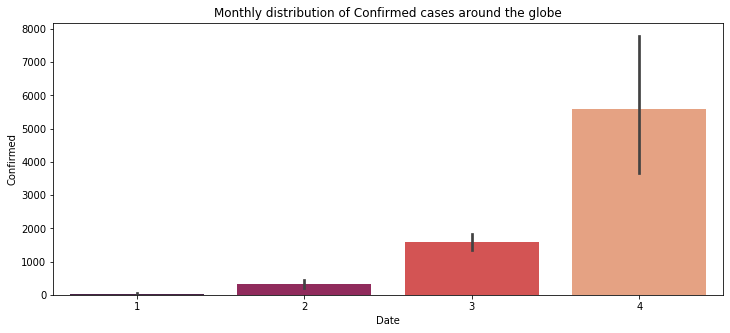

In [8]:
#Graphical representation of confirmed case trend across the globe
plt.figure(figsize=(12,5))
sns.barplot(df['Date'].dt.month,df['Confirmed'],palette='rocket')
plt.title('Monthly distribution of Confirmed cases around the globe')
plt.show()

### As we can infer from the graph irrespective of the location there is a trend in increase of confirmed cases with each month go by. 

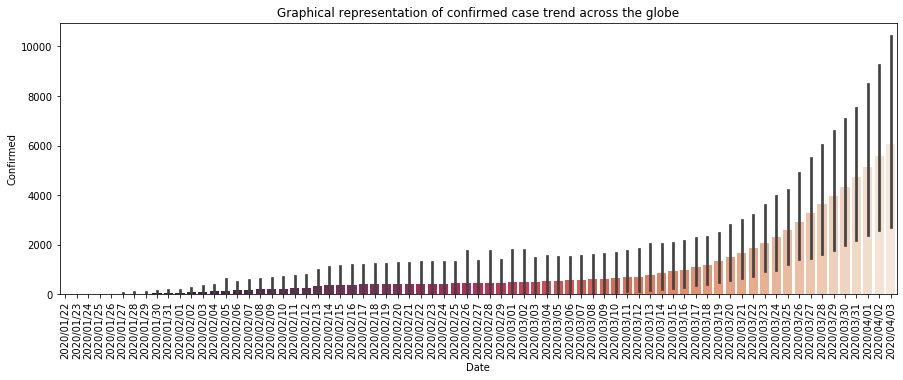

In [62]:
plt.figure(figsize=(15,5))


sns.barplot(x= df['Date'].dt.strftime('%Y/%m/%d'),y= df['Confirmed'],palette='rocket')
plt.title('Graphical representation of confirmed case trend across the globe')
plt.xticks(rotation=90)
plt.show()

### As we can see the increase trend in cases daily irrespective of the location.

In [ ]:
#Graphical representation of confirmed case trend in following countries (China, US, Italy, Spain, Germany, Iran, France, South Korea, United Kingdom & Switzerland)

In [12]:
# selected the selected countries data
df_sort = df[df['Country/Region'].isin (['China','US','Italy','Spain','Germany', 'Iran','France','South Korea','United Kingdom' ,'Switzerland'])]
df_sort['Country/Region'].value_counts()


Iran              73
Switzerland       73
China             73
US                73
Italy             73
South Korea       73
Spain             73
France            73
Germany           73
United Kingdom    73
Name: Country/Region, dtype: int64

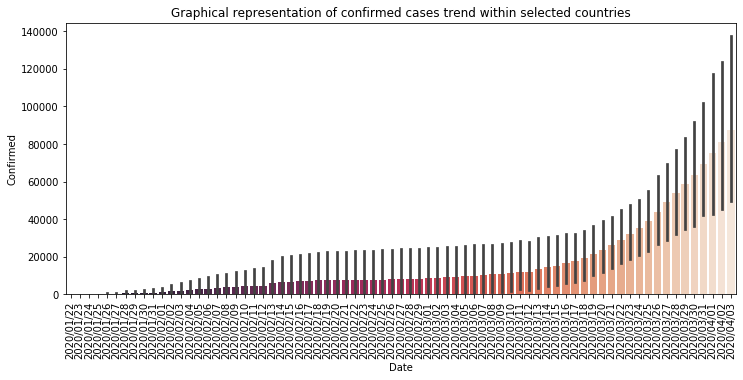

In [13]:
plt.figure(figsize=(12,5))
sns.barplot(x= df_sort['Date'].dt.strftime('%Y/%m/%d'),y= df_sort['Confirmed'],palette='rocket')
plt.title('Graphical representation of confirmed cases trend within selected countries')
plt.xticks(rotation=90)
plt.show()

### Top 5 countries with highest confirmed cases in each month


In [15]:
df['Month'] = df.Date.dt.month
df.groupby(['Month','Country/Region']).agg({'Confirmed':'sum'}).sort_values(by=['Month','Confirmed'],ascending=[True,False]).groupby('Month').head(5)

Confirmed
Month Country/Region             
1     China                 38008
      Thailand                 94
      Japan                    56
      Singapore                53
      Taiwan*                  52
2     China               1634869
      South Korea           12128
      Diamond Princess      10076
      Italy                  3966
      Japan                  2334
3     China               2515426
      Italy               1207121
      US                  1086308
      Spain                742546
      Germany              588179
4     US                   732411
      Italy                345643
      Spain                335382
      Germany              253825
      China                247304

In [16]:
# Custom function to find Rate of Increase
def rate_of_increase(series):
       return series.values[len(series)-1]-series.values[0]

### Top 5 Countries with highest rate of increase in each month


In [17]:

df.groupby(['Month','Country/Region']).agg({'Confirmed':[rate_of_increase]}).sort_values(by=['Month',('Confirmed','rate_of_increase')],ascending=[True,False]).groupby('Month').head(5)#df[(df['Month']==1) & (df['Country/Region']=='China')]['Confirmed'].values[0]

Confirmed
                       rate_of_increase
Month Country/Region                   
1     China                        9254
      Thailand                       17
      Japan                          13
      Singapore                      13
      South Korea                    10
2     China                       67465
      South Korea                  3138
      Italy                        1126
      Diamond Princess              705
      Iran                          593
3     US                         188098
      Italy                      104098
      Spain                       95839
      Germany                     71678
      France                      52697
4     US                          62214
      Spain                       15081
      Germany                     13287
      Italy                        9253
      United Kingdom               8824

### Normal distribution graph of death rate  (deaths/confirmed)  across countries along with mean, median & standard deviations for death rate

In [19]:
df.describe()

,Confirmed,Deaths,Recovered,Month
count,13213.000000,13213.000000,13213.000000,13213.000000
mean,1032.888670,44.847953,280.615909,2.369863
std,8443.956572,472.839985,3592.597013,0.767641
min,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,2.000000
50%,0.000000,0.000000,0.000000,2.000000
75%,16.000000,0.000000,0.000000,3.000000
max,275586.000000,14681.000000,76760.000000,4.000000


In [20]:
df['death_rate'] = df['Deaths']/df['Confirmed']

In [21]:
df = df.fillna(0)
df.head()

,Country/Region,Date,Confirmed,Deaths,Recovered,Month,death_rate
0,Australia,2020-01-22,0,0,0,1,0.000000
1,Canada,2020-01-22,0,0,0,1,0.000000
2,China,2020-01-22,548,17,28,1,0.031022
3,Denmark,2020-01-22,0,0,0,1,0.000000
4,France,2020-01-22,0,0,0,1,0.000000


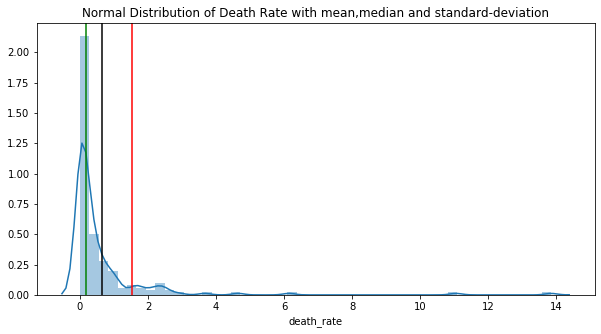

In [24]:
plt.figure(figsize=(10,5))

df_death= df.groupby('Country/Region').agg({'death_rate':'sum'})
sns.distplot(df_death['death_rate'])
plt.title('Normal Distribution of Death Rate with mean,median and standard-deviation')
plt.axvline(df_death['death_rate'].mean(),color='black')
plt.axvline(df_death['death_rate'].median(),color='green')
plt.axvline(df_death['death_rate'].std(),color='red')
plt.show()
